![Py4Eng](img/logo.png)

# Machine learning
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)

# Machine learning with *scikit-learn*

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*scikit-learn* is a Python package for machine learning:


- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

We will do [one of the many tutorials](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) from the *scikit-learn* website. 

You can install *scikit-learn* with `conda install scikit-learn`.

## Supervised learning: predicting an output variable from high-dimensional observations

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. Most often, `y` is a 1D array of length `n_samples`.

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

## Iris dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

![RA Fisher](https://upload.wikimedia.org/wikipedia/commons/4/46/R._A._Fischer.jpg)

![Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)

Let's start by loading the dataset (you might need to install *scikit-learn*, use `conda install sklearn`).

In [2]:
import sklearn.datasets

iris = sklearn.datasets.load_iris()
print("Features:", iris.feature_names)
print("Types:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Types: ['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## k-Nearest neighbors classifier (KNN)

The simplest possible classifier is the nearest neighbor: given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

> Training set and testing set
> 
> While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation (I'm setting the random seed to 0 for reproducability):

In [4]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]

Import the nearest-neighbor classifier, then create and fit it:

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

Predict the labels (Iris species) for the test data and compare with the real labels:

In [7]:
iris_y_predict = knn.predict(iris_X_test)
print(iris_y_predict)
print(iris_y_test)
print('Precision:', (iris_y_predict == iris_y_test).mean())

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]
Precision: 0.9


# Reduce dimensions

To reduce the dimensionality of the problem (4 features - 4D) we can use *Seaborn*'s `PairGrid` plot to look for features that are well correlated:

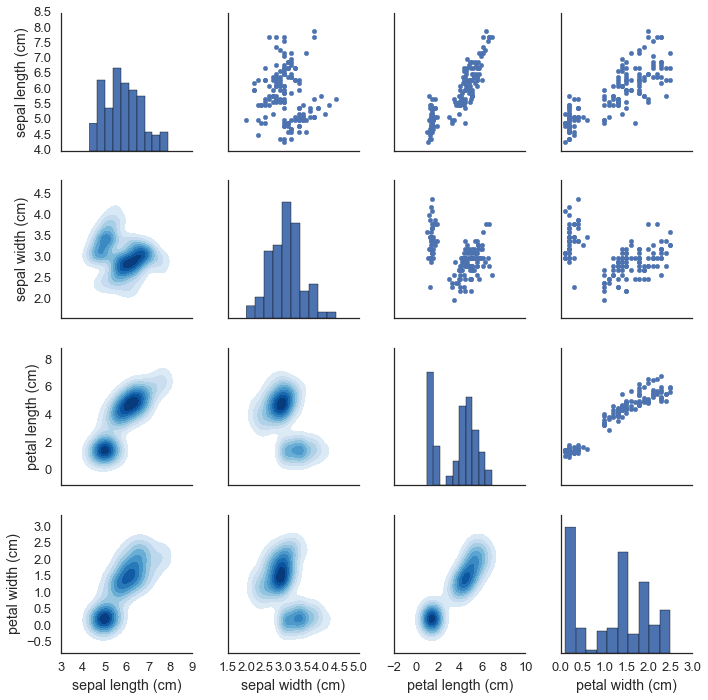

In [8]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='Blues', legend=False, shade=True, shade_lowest=False)
g.map_diag(plt.hist);

Seems that the least correlated features are :

- sepal width - sepal length
- petal width - sepal width

Let's work just with the sepal then - the first two colums.

Split to training and testing:

In [9]:
iris_X_train = iris.data[indices[:-10],:2]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:],:2]
iris_y_test  = iris.target[indices[-10:]]

Fit and predict:

In [10]:
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
iris_y_predict = knn.predict(iris_X_test)
print(iris_y_predict)
print(iris_y_test)
print('Precision:', (iris_y_predict == iris_y_test).mean())

[1 2 1 0 0 0 2 2 2 0]
[1 1 1 0 0 0 2 1 2 0]
Precision: 0.8


We didn't lose much precision, but now that we are in 2D we can plot the classifier fit:

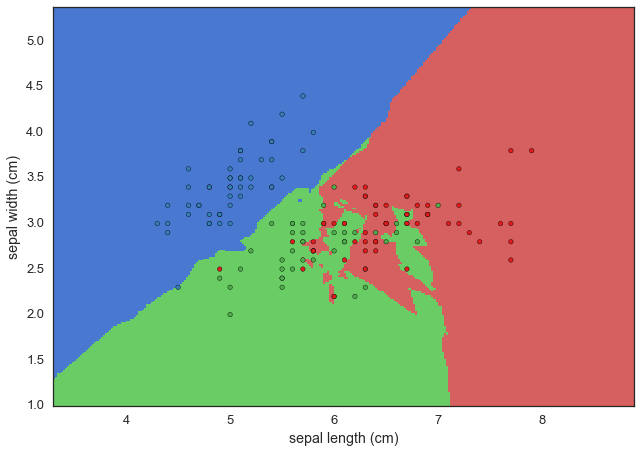

In [11]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
X = iris.data[:,:2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(sorted(sns.color_palette('muted', 3)))
cmap_bold = ListedColormap(sorted(sns.color_palette('Set1', 3)))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax.set(
    xlim=(xx.min(), xx.max()),
    ylim=(yy.min(), yy.max()),
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1]
);

# Linear model: from regression to sparsity
## Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year:

In [12]:
diabetes = sklearn.datasets.load_diabetes()
df = pd.DataFrame(data=diabetes['data'])#, columns=diabetes['target'])
df['target'] = diabetes['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [13]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

## Linear regression

`LinearRegression`, in it’s simplest form, fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear models: $y = X\beta + \epsilon$

- $X$: data
- $y$: target variable
- $\beta$: Coefficients
- $\epsilon$: Observation noise

Let's import the `linear_model` module:

In [14]:
from sklearn import linear_model

We fit the linear regression, similarly to the KNN fit from above, and fit the coefficients ($\beta_i$).

In [15]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


The mean square error is one measure for the good of the fit:

In [16]:
diabetes_y_predict = regr.predict(diabetes_X_test)
print("Mean square error:", np.mean((diabetes_y_predict - diabetes_y_test)**2))

Mean square error: 2004.56760269


Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between `X` and `Y`:

In [17]:
print("Explained variance score:", regr.score(diabetes_X_test, diabetes_y_test))

Explained variance score: 0.585075302269


## Exercise: Lasso

To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones, like feature 2 to 0.

A penalization approach, called *Lasso* (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called *parse methods* and sparsity can be seen as an application of *Occam’s razor*: prefer simpler models.

Use `linear_model.Lasso` instead of `linear_model.LinearRegression` to fit the data. Note that prior to applying the fit, you need to set the `alpha` parameter of the regression object using `regr.set_params(alpha=...)`. This parameter determines the strengh of the penalization. Fit the data for various values of $\alpha \in (10^{-4}, 10^{-6})$ and find the value that gives the best score (in terms of `regr.score`). Finally, print the regressions coefficients and find which variables had a zero coefficeint.

### Bonus

Try to add more alpha values, and plot the score of each fit vs. the corresponding alpha value.

# References

- [scikit-learn supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

## Colophon
This notebook was written by [Yoav Ram](http://www.yoavram.com) and is part of the _Python for Engineers_ course.

The notebook was written using [Python](http://pytho.org/) 3.4.4, [IPython](http://ipython.org/) 4.0.3 and [Jupyter](http://jupyter.org) 4.0.6.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)